In [24]:
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

Chargement des données

In [25]:
# Chemin vers le .env
env_path = r"C:\Users\NoémieRondel\OneDrive - talan.com\Certification\Projet final\Projet Veille IA\scripts\.env"



# Charger les variables d'environnement
load_dotenv(dotenv_path=env_path)

# Récupérer les informations depuis le fichier `.env`
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_host = os.getenv("DB_HOST")
db_name = os.getenv("DB_NAME")

# Créer la connexion à la base de données
db_connection_str = f"mysql+pymysql://{db_user}:{db_password}@{db_host}/{db_name}"
db_connection = create_engine(db_connection_str)

# Charger les données depuis la table `articles`
query = "SELECT * FROM articles"
df = pd.read_sql(query, con=db_connection)

# Afficher un aperçu des données
df.head()

,id,title,source,publication_date,content,language,link,author,keywords
0,217,Microsoft is a Leader in Gartner Magic Quadran...,Azure Blog,2024-11-12,We are excited to share that Microsoft has bee...,english,https://azure.microsoft.com/en-us/blog/microso...,Scott Hunter,AI Applications;AI Deployment;AWS AI;Azure Ope...
1,218,Enhance the security and operational capabilit...,Azure Blog,2024-11-11,With the increased adoption of cloud-native te...,english,https://azure.microsoft.com/en-us/blog/enhance...,Chandan Aggarwal and Deepak Bansal,AI Deployment;AWS AI;Azure OpenAI Service;Clou...
2,219,Unlocking the future: Azure networking updates...,Azure Blog,2024-11-07,Our latest enhancements strengthen core networ...,english,https://azure.microsoft.com/en-us/blog/unlocki...,Narayan Annamalai,AI Applications;AI Deployment;AI Regulation;AW...
3,220,"6 insights to make your data AI-ready, with Ac...",Azure Blog,2024-11-07,I sat down with Teresa Tung to learn more abou...,english,https://azure.microsoft.com/en-us/blog/6-insig...,Susan Etlinger,AI Applications;AI Deployment;AI Ethics;AI Reg...
4,221,Discover innovative AI solutions with the Micr...,Azure Blog,2024-11-06,"As organizations embrace AI transformation, th...",english,https://www.microsoft.com/en-us/microsoft-clou...,Anthony Joseph,AI Applications;AI Deployment;AI Ethics;AI Reg...


Statistiques de base

In [26]:
# Résumé statistique
df.describe(include='all')

,id,title,source,publication_date,content,language,link,author,keywords
count,937.000000,937,937,937,937,937,937,937,937
unique,NaN,930,8,88,934,1,937,195,906
top,NaN,OpenAI 2024 event: How to watch new ChatGPT pr...,TechCrunch,2025-01-07,"ChatGPT, OpenAI’s text-generating AI chatbot, ...",english,https://www.technologyreview.com/2025/01/08/11...,Dean Takahashi,AI Applications;AI Deployment;AI Ethics;AI Fai...
freq,NaN,4,330,56,2,937,1,64,5
mean,1714.633938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,841.079344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,217.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,984.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1847.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2435.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vérification des valeurs manquantes

In [27]:
# Vérifier les valeurs manquantes
df.isnull().sum()

id                  0
title               0
source              0
publication_date    0
content             0
language            0
link                0
author              0
keywords            0
dtype: int64

Distribution des sources

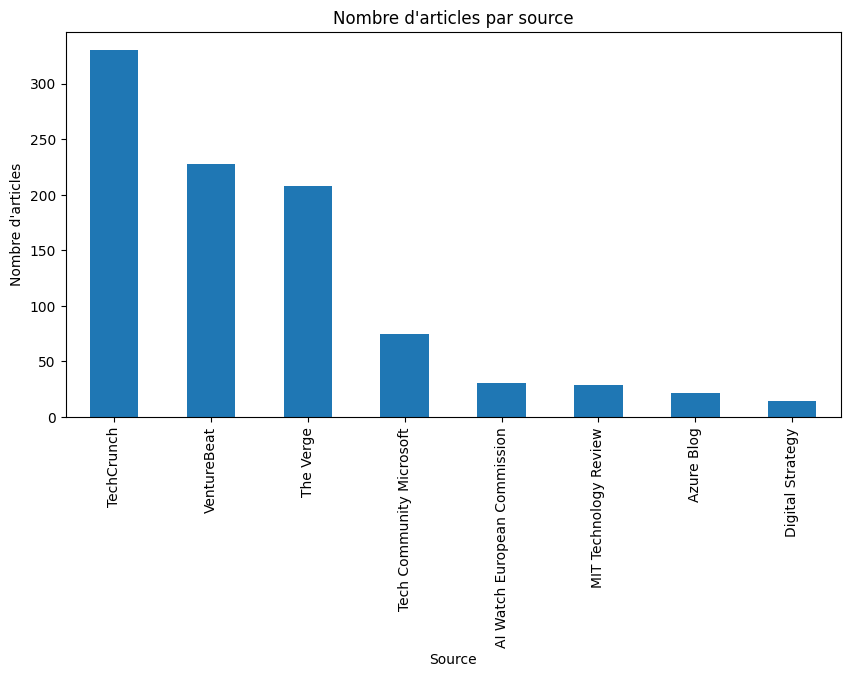

In [28]:
# Distribution des articles par source
df['source'].value_counts().plot(kind='bar', figsize=(10, 5), title='Nombre d\'articles par source')
plt.xlabel('Source')
plt.ylabel('Nombre d\'articles')
plt.show()

Nuage de mots pour les contenus

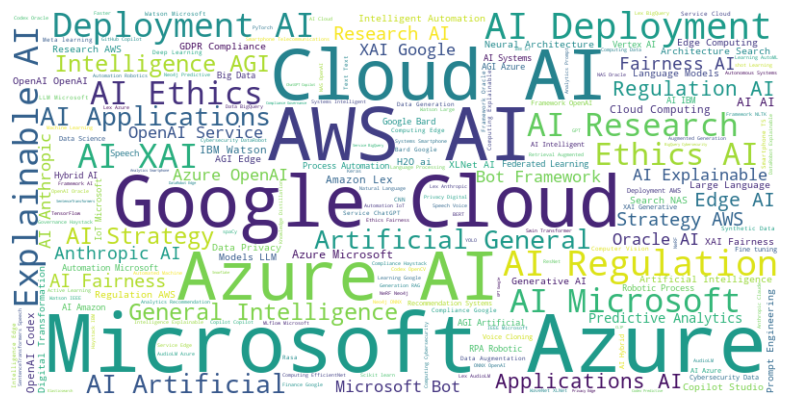

In [30]:
# Combiner tout le texte des articles
text = ' '.join(df['keywords'].dropna())

# Générer le WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Afficher le WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Analyse temporelle

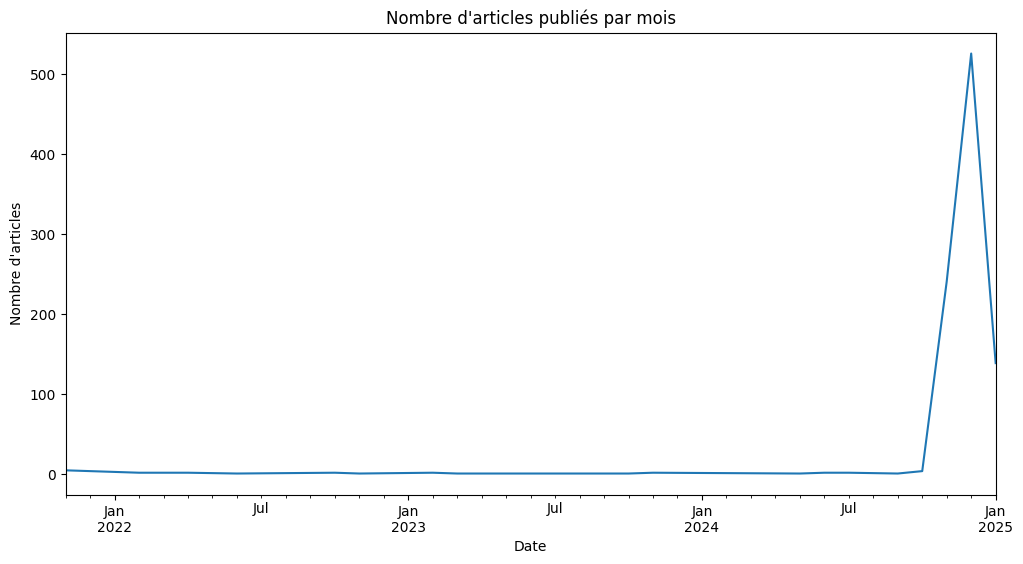

In [31]:
# Convertir la colonne publication_date en datetime si ce n'est pas déjà fait
df['publication_date'] = pd.to_datetime(df['publication_date'])

# Nombre d'articles publiés par mois
df.groupby(df['publication_date'].dt.to_period('M')).size().plot(kind='line', figsize=(12, 6), title='Nombre d\'articles publiés par mois')
plt.xlabel('Date')
plt.ylabel('Nombre d\'articles')
plt.show()